#**Udactiy: Introduction to TensorFlow for Deep Learning**

##Lesson 2
In this colab notebook, you would learn to **build and train a neural network** to convert celsius to fahrenheit, equation given below.
$$ f = c \times 1.8 + 32 $$

##Building and training a neural network
1. Define the layers for the neural network
2. Assemble the defined layer
3. Compile the built model, define the loss and optimiser functions for the model
4. Train the model



## Import depenencies


In [ ]:
import tensorflow as tf
import numpy as np
import logging

# Essentially only log error from tensorflow
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

##Define Training data

Get the data that would be used to train the model. Recap that our model would take celsius degree as input and fahrenheit as an output.   

Machine learning terminology
- **Features**: Inputs to our model
- **Label**: Output from our model
- **Example**: A pair of feature and corresponding label. An example is used in training a model


In [ ]:
# input data for our model
celsius    = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)

# output data for our model
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for index, input in enumerate(celsius):
  print("{} degrees Celsius  = {} degrees Fahrenheit".format(input, fahrenheit[index]))


-40.0 degrees Celsius  = -40.0 degrees Fahrenheit
-10.0 degrees Celsius  = 14.0 degrees Fahrenheit
0.0 degrees Celsius  = 32.0 degrees Fahrenheit
8.0 degrees Celsius  = 46.0 degrees Fahrenheit
15.0 degrees Celsius  = 59.0 degrees Fahrenheit
22.0 degrees Celsius  = 72.0 degrees Fahrenheit
38.0 degrees Celsius  = 100.0 degrees Fahrenheit


##1. Define the Layers in the Neural Network

For this lesson, **we would build a very simple model consisting of 1 layer, this single layer would consist of 1 neuron.** So in reality we have made a neural network consisting of 1 neuron.

Different types of layers
- **Input layer**: First layer in the neural network, this layer takes the features as input. So for this layer we would have to define the input_shape.
- **Hidden layer**: Layers between the input layer and the output layer, you don't need to define the input_shape.
- **Output layer**: Final layer in the neural network, this layer would produce the desired output for the neural network.

<br />

Different types of layer connection
- **Dense connectivity**: All the neurons in this current layer are connected to the neuron in the previous layer
- **Sparse connectivity**: Only some of the neurons in this layer are connected to the neuron in the previous layer 

<br />

Parameters for a layer
- **Input_shape**: Primarly used for the first layer (input layer). It defines the dimension of the input feature for an example. 
- **Units**: Defines the number of neurons in the layer


*Side note since our model is a single layer with a single neuron. The number of neuron (units) is also the size of the model's output. i.e a single output*

In [ ]:
# define a single layer for our model
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

##2. Assemble the defined layers
Sequential model take a list of layer as argument, specifying the calculation order from input to output.

In [ ]:
model = tf.keras.Sequential([l0])

##3. Compile the built model, define the loss and optimizer function for the model

After the layers have been assembled into a model, it needs to be compiled. *Essentially define the loss & optimizer function that would be used during training*

- **loss function**: This is the cost function for our neural network, it calculates an error between the model's prediction and the label. This error is used as a measure of how well the predictions are.

- **Optimizer function**: This function aims to minimise the model's error in predicting the label., so it is used to adjust the model's internal parameter untill the error is low.

In [ ]:
# mean squared error used as loss function
# Adam's used as optimizer with a learning rate of 0.1
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

##4. Train the model

Initially the model's internal parameter are randomly set.

**How model's are trained? A single training step**
- The model use an example (a feature and label pair), using the features as input to make it's prediction.
- Predictions are calculated using the internal variables (weights & bias) and input features.
- The predicition is then compared against the label to determine the error.
- Using the model's error the internal variables are then adjusted.   

</br>

The cycle of making predicition, determining the error and then adjusting the internal variable is repeated several times untill the model has finished training.

</br>

Side note   
An epoch is a single iteration through the entire training set. So with 500 epoch, the neural network has gone through the entire training set 500 times. Seeint in total 3500 (7*500) examples. 


In [ ]:
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print('Finished training the model')

Finished training the model


##Display training statistics

Show information about the model's loss as the number of epoch increase

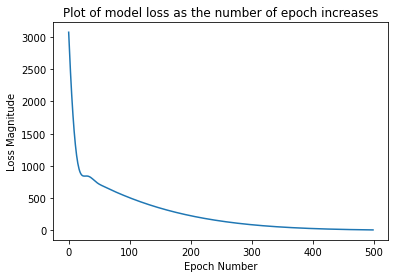

In [ ]:
import matplotlib.pyplot as plt

plt.title('Plot of model loss as the number of epoch increases')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

Looking at the plot as epoch increases, the loss decreases. There a sharper decrease in loss within the first 100 epoch, followed by a more gradual decrease afterwards.

<br />

Some questions?
- Why the bump around the ~25 epoch?


- Is it good to loss of 0 towards the very end?
it could suggest that the model is overfitting the training dataset.

</br>

Would you trust this model for a mission critical application which convert temperatures in celsuis to farenheit? *A bit deep for a the first model, but i'm not sure, it depends on the tolerance of the system or rather how much error i am willing to accept or what the consequence of that error would be*

##Make some prediction using the trained model?

In [ ]:
# Making prediction using training data
for index, input in enumerate(celsius):
  print('Input: {}, model prediction: {}, expected output {}'.format(input, model.predict([input]), fahrenheit[index]))

Input: -40.0, model prediction: [[-43.874104]], expected output -40.0
Input: -10.0, model prediction: [[10.810682]], expected output 14.0
Input: 0.0, model prediction: [[29.038944]], expected output 32.0
Input: 8.0, model prediction: [[43.62155]], expected output 46.0
Input: 15.0, model prediction: [[56.381336]], expected output 59.0
Input: 22.0, model prediction: [[69.14112]], expected output 72.0
Input: 38.0, model prediction: [[98.306335]], expected output 100.0


In [ ]:
# Using a new feature
print(model.predict([100.0]))

[[211.32155]]


##Looking at model internal variable

Peak into the internal variables (weights & bias)

In [ ]:
print('Layer 0 internal variables {}'.format(l0.get_weights()))

Layer 0 internal variables [array([[1.8228261]], dtype=float32), array([29.038944], dtype=float32)]


Recap the equation used to convert degrees celsius to degrees farenheit
$$ f = c \times 1.8 + 32 $$

The model parameters are 1.82 (weight) and 29.03 (bias). These are relatively close to those of the conversion equation 1.8 & 32.


#**Train a new neural network**

train a different neural network and see how it compares to the first model

In [ ]:
l1 = tf.keras.layers.Dense(units=8, input_shape=[1])
l2 = tf.keras.layers.Dense(units=4)
l3 = tf.keras.layers.Dense(units=2)
l4 = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([l1, l2, l3, l4])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model2.fit(celsius, fahrenheit, epochs=500, verbose=False)
print('Model finished training')

# prediction on training set
for index, Feature in enumerate(celsius):
  print('Feature: {}, Prediction: {}, Label: {}'.format(Feature, model2.predict([Feature]), fahrenheit[index]))


# prediction on a new example
new_feature = 100
expected_label = 212
print('\nFor input degree celsius ({}) model predict {} as temperature in farenheit, expected label: {}'.format(new_feature, model2.predict([new_feature]), expected_label))

Model finished training
Feature: -40.0, Prediction: [[-39.96543]], Label: -40.0
Feature: -10.0, Prediction: [[13.973035]], Label: 14.0
Feature: 0.0, Prediction: [[31.952522]], Label: 32.0
Feature: 8.0, Prediction: [[46.336117]], Label: 46.0
Feature: 15.0, Prediction: [[58.92176]], Label: 59.0
Feature: 22.0, Prediction: [[71.507416]], Label: 72.0
Feature: 38.0, Prediction: [[100.27459]], Label: 100.0

For input degree celsius (100) model predict [[211.7474]] as temperature in farenheit
